# Lab 4 / Intro to ML

PHYS 427\
2/11/2020 (Tue)\
Jin Kyoung Lee

In this assignment, we will look into two types of machine learning: Booested Decision Trees (BDT) and Neural Networks (NN). By using the same data used in lab 3, we will build and train BDT and NN to predict the decay length (Lxy). Moreover, the actual data and predicted data will be compared to see which type of ML works better.

In [1]:
# Importing libraries
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import polyfit
import seaborn as sns
import uproot
import pandas as pd

In [2]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

### 1. Boosted Decision Trees and Neural Notworks
#### - Boosted Decision Trees
Decision tree is an analysis method that shows decision rules into a tree structure to perform classification and prediction. Decision tree analyzes data and represents patterns that exist between the data as a combination of predictable rules. In this assignment, regression tree will be used, so the node will be splited by the mean and standard deviation of the target value. 
#### - Neural Networks
Neural Network is built based on the operating principles of human neurons to train computers. There are input layer, hidden layer, and output layer in Neural Network, and between those layers, there are two components called weight and bias. The output is generated through activation function (Sigmoid, ReLU, etc.) after multiplying the input by the weight and adding bias. The training can be done by going through optimization process of finding appropriate values by changing weight and bias to produce desired output.

### 2. Building BDT and NN for decay length Lxy

In [3]:
# Importing data

# Defining function to put root files into data frame
def df(dfFile, fileName, treeDefine, treeName):
    dfFile = uproot.open(fileName)
    treeDefine = dfFile[treeName]
    return treeDefine.pandas.df(["IsLLP","JetPt","L[xy]","EMM_BL0","EMM_EL0","EH_EL0","EH_CBL0","EH_TGL0","EH_EBL0","FC_L0"])

# Assigning DataFrames
df1 = df("df_1","LLPfiles/df_1.root","df_1_tree","pandas_tree218")
df2 = df("df_2","LLPfiles/df_2.root","df_2_tree","pandas_tree51358")
df3 = df("df_3","LLPfiles/df_3.root","df_3_tree","pandas_tree53278")
df4 = df("df_4","LLPfiles/df_4.root","df_4_tree","pandas_tree52558")
df5 = df("df_5","LLPfiles/df_5.root","df_5_tree","pandas_tree53038")
df6 = df("df_6","LLPfiles/df_6.root","df_6_tree","pandas_tree54718")

# Merging files into single DataFrame
dfMerged = [df1,df2,df3,df4,df5,df6]
df_all = pd.concat(dfMerged,keys=['df1','df2','df3','df4','df5','df6']) # categorizing the files

In [4]:
# Assigning LLP = True, False data
df_isLLP = df_all[df_all.IsLLP.eq(True)]
df_notLLP = df_all[df_all.IsLLP.eq(False)]

#### - Boosted Decision Trees

In [5]:
# Splitting dataset in features and target variable 
feature_cols = ["EMM_BL0","EMM_EL0","EH_EL0","EH_CBL0","EH_TGL0","EH_EBL0","FC_L0"]
X = df_isLLP[feature_cols] # Features
y = np.sqrt((df_isLLP.Lx**2)+(df_isLLP.Ly**2)) # Target variable

# Splitting dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [6]:
# Create Decision Tree Regressor object
tree = DecisionTreeRegressor()

In [7]:
# Train Decision Tree Regressor
tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [8]:
# Predicted Lxy by BDT
y_pred_BDT = tree.predict(X_test)

In [9]:
# Plotting scatter plot to see the correlation of actual vs predicted (by BDT) Lxy
def scatter(test, pred):
    plt.figure(figsize = (10, 5))
    plt.scatter(test, pred, s = 3)
    plt.xlabel("Actual Lxy")
    plt.ylabel("Predicted Lxy")
    plt.grid(which='major', color='#666666', linestyle='-', alpha=0.2)
    plt.show()

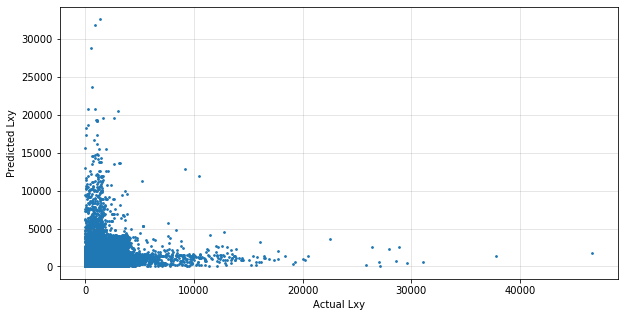

In [10]:
scatter(y_test, y_pred_BDT)

In [11]:
def hist(test, pred, xlim, ylim):
    plt.figure(figsize = (10, 5))
    plt.hist2d(test, pred, bins = 500)
    cb = plt.colorbar()
    #cb.set_label('colorbar label')
    plt.xlabel("Actual Lxy")
    plt.ylabel("Predicted Lxy")
    plt.grid(which='major', color='#666666', linestyle='-', alpha=0.5)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.show()

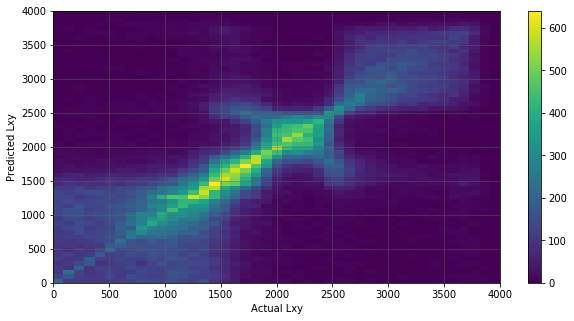

In [12]:
hist(y_test, y_pred_BDT, [0,4000], [0,4000])

#### - Neural Notworks (MLPRegressor)

In [13]:
# Normalize data
scaler = StandardScaler()

# Fitting only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
# Applying the transformations to the data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Create Neural Network object
mlp = MLPRegressor(hidden_layer_sizes = (7,1), max_iter = 300, alpha = 0.0001, random_state = 42)

In [16]:
# Train Neural Network
mlp.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(7, 1), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=300,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=42, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [17]:
# Predicted Lxy by NN
y_pred_NN = mlp.predict(X_test)

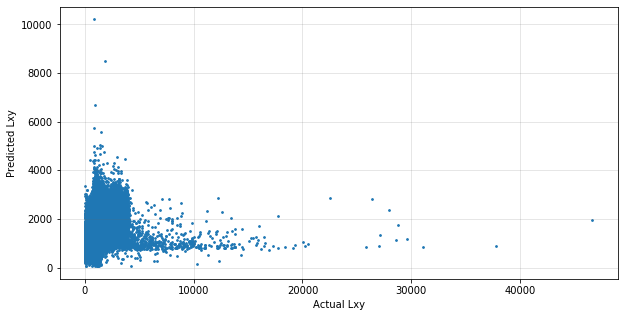

In [18]:
# Scatter plot to see the correlation of actual vs predicted (by NN) Lxy
scatter(y_test, y_pred_NN)

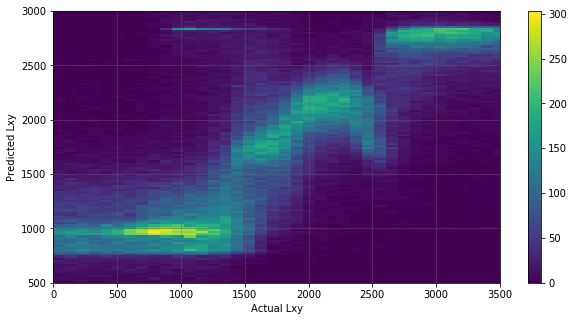

In [19]:
hist(y_test, y_pred_NN, [0,3500], [500,3000])

#### - Which algorithm does better?

In [20]:
# Putting actual and predicted (both BDT and NN) Lxy in a DataFrame
df_ML = pd.DataFrame({'Actual': y_test, 'Predicted (BDT)': y_pred_BDT,
                      'Predicted (NN)': y_pred_NN})
df_ML

Actual  Predicted (BDT)  Predicted (NN)
    entry                                                
df6 355360   1724.750922      2468.868487     1779.358830
df4 76668     799.605175       612.576984      892.621898
    276579   1365.612558      1881.961939     1648.053277
df2 136013   3143.612305      2812.840213     2789.642432
df3 220514   1596.819015      1579.964297     1716.737408
...                  ...              ...             ...
df2 433003   2730.275873      2769.293908     2720.276821
df5 249022   2371.504219      2299.940245     1977.976321
df6 990130   2146.646918      1916.424088     2251.634983
df3 265054   2204.970510      2445.802340     2352.753623
df6 1501457  3558.815588      2725.824408     2712.188262

[176803 rows x 3 columns]

By seeing the scatter plots and histograms, It seems Boosted Decision Trees gives better results (predicted Lxy using NN is closer to the actual Lxy) than Neural Networks. The histogram for actual Lxy vs. predicted Lxy by BDT shows clearer correlation between actual and predicted value than the histogram for NN results.

### 3. Running regression on IsLLP = False jets

In [21]:
X_notLLP = df_notLLP[feature_cols]
y_notLLP = np.sqrt((df_notLLP.Lx**2)+(df_notLLP.Ly**2))
X_notLLP_train, X_notLLP_test, y_notLLP_train, y_notLLP_test = train_test_split(X_notLLP, y_notLLP, test_size = 0.25, random_state = 42)

#### - BDT

In [22]:
tree.fit(X_notLLP_train, y_notLLP_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [23]:
y_notLLP_pred_BDT = tree.predict(X_notLLP_test)

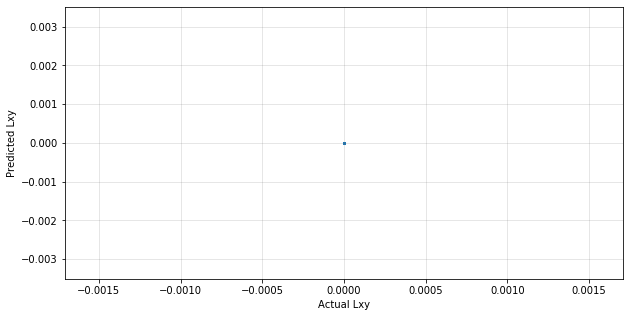

In [24]:
scatter(y_notLLP_test, y_notLLP_pred_BDT)

#### - NN

In [25]:
mlp.fit(X_notLLP_train, y_notLLP_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(7, 1), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=300,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=42, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [26]:
y_notLLP_pred_NN = tree.predict(X_notLLP_test)

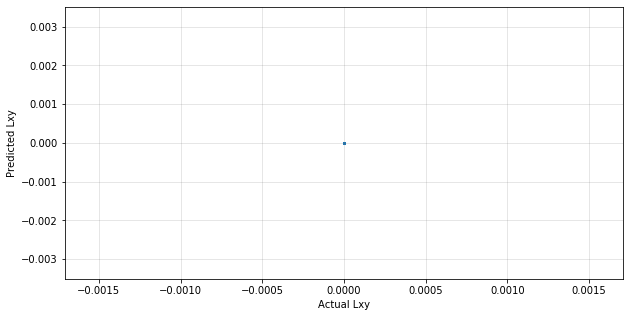

In [27]:
scatter(y_notLLP_test, y_notLLP_pred_NN)

In [28]:
df_ML_notLLP = pd.DataFrame({'Actual': y_notLLP_test, 'Predicted (BDT)': y_notLLP_pred_BDT,
                      'Predicted (NN)': y_notLLP_pred_NN})
df_ML_notLLP

Actual  Predicted (BDT)  Predicted (NN)
    entry                                           
df3 95451       0.0              0.0             0.0
df6 1199445     0.0              0.0             0.0
    1591788     0.0              0.0             0.0
df2 23269       0.0              0.0             0.0
df6 1450220     0.0              0.0             0.0
...             ...              ...             ...
df3 179289      0.0              0.0             0.0
df4 143979      0.0              0.0             0.0
df2 630616      0.0              0.0             0.0
    295002      0.0              0.0             0.0
df6 1114634     0.0              0.0             0.0

[685263 rows x 3 columns]

It is shown at the above results, when running the regression on IsLLP = False jets, the predicted Lxy values match the actual Lxy, which is zero decay length.

### 4. Running regression including some of IsLLP = False

In [29]:
# Including some LLP = False to LLP = True
combLLP = pd.concat([df_notLLP[3:5500], df_isLLP, df_notLLP[45000:100000]])
# Number of LLP True data used: len(df_isLLP) = 707209
# Number of LLP False data used: len(df_notLLP[3:5500]) + len(df_notLLP[45000:100000]) = 60497

In [30]:
X_combLLP = combLLP[feature_cols]
y_combLLP = np.sqrt((combLLP.Lx**2)+(combLLP.Ly**2))
X_combLLP_train, X_combLLP_test, y_combLLP_train, y_combLLP_test = train_test_split(X_combLLP, y_combLLP, test_size = 0.25, random_state = 42)

#### - BDT

In [31]:
tree.fit(X_combLLP_train, y_combLLP_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [32]:
y_combLLP_pred_BDT = tree.predict(X_combLLP_test)

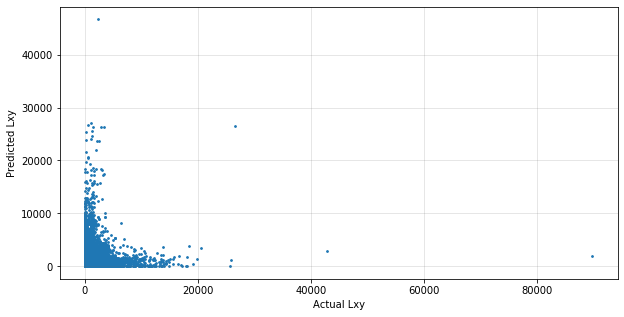

In [33]:
scatter(y_combLLP_test, y_combLLP_pred_BDT)

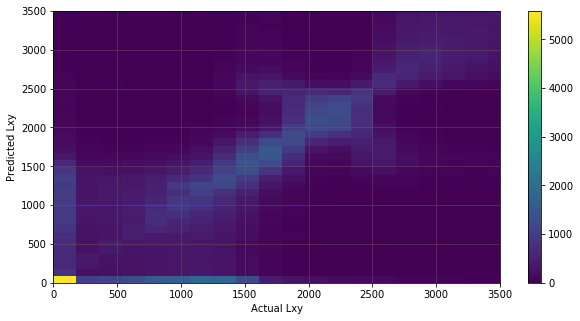

In [34]:
hist(y_combLLP_test, y_combLLP_pred_BDT, [0,3500], [0,3500])

#### - NN

In [40]:
mlp.fit(X_combLLP_train, y_combLLP_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(7, 1), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=300,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=42, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
# Training interrupted because of training time took too long.

In [41]:
y_combLLP_pred_NN = tree.predict(X_combLLP_test)

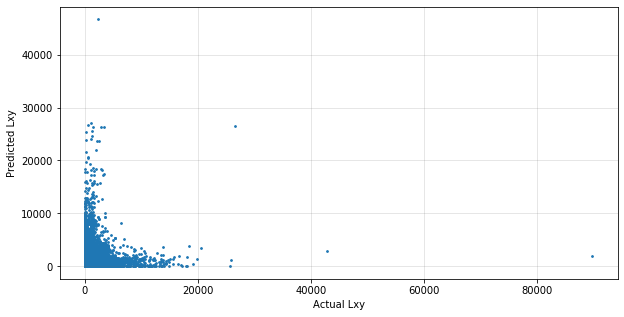

In [42]:
scatter(y_combLLP_test, y_combLLP_pred_NN)

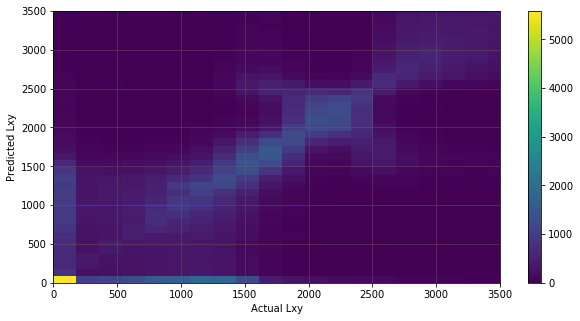

In [43]:
hist(y_combLLP_test, y_combLLP_pred_NN, [0,3500], [0,3500])

In [44]:
df_ML_combLLP = pd.DataFrame({'Actual': y_combLLP_test, 'Predicted (BDT)': y_combLLP_pred_BDT,
                      'Predicted (NN)': y_combLLP_pred_NN})
df_ML_combLLP

Actual  Predicted (BDT)  Predicted (NN)
    entry                                                
df4 99302    2327.212189      1936.484480     1936.484480
df2 226251   1584.384448        68.697032       68.697032
    74163    2863.516649      3070.913539     3070.913539
df3 329985   2100.716836      2471.897377     2471.897377
df2 84783       0.000000      2492.755437     2492.755437
...                  ...              ...             ...
df6 730432   3230.075121      3466.327530     3466.327530
df3 264991   1339.781714      1759.803494     1759.803494
df6 1141050  3426.003432      1468.175697     1468.175697
df4 86074      24.961363      3794.150797     3794.150797
    7685      160.858143      1412.607610     1412.607610

[191927 rows x 3 columns]